In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from projects.data_quality_validation.data_quality_checks import DataQualityChecks

In [12]:
dq = DataQualityChecks("./../datasets/wine_quality_corrupted.csv")
df = dq.get_dataframe()

print("Dataset Preview:")
df.head()

Dataset loaded successfully.
Dataset Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,3.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,4.0


In [13]:
print("Null Values Count:")
print(dq.check_null_values())
print(f"Duplicate Rows: {dq.check_duplicates()}")
print("Outliers based on Z-score:")
print(dq.check_outliers_zscore())
print("Outliers based on IQR:")
print(dq.check_outliers_iqr())  # Check if missing values exist

Null Values Count:
alcohol    52
quality     5
Id          5
dtype: int64
Duplicate Rows: 10
Outliers based on Z-score:
123
Outliers based on IQR:
fixed acidity            49
volatile acidity         15
citric acid               1
residual sugar          116
chlorides                79
free sulfur dioxide      20
total sulfur dioxide     40
density                  40
pH                       20
sulphates                43
alcohol                  13
quality                  22
dtype: int64


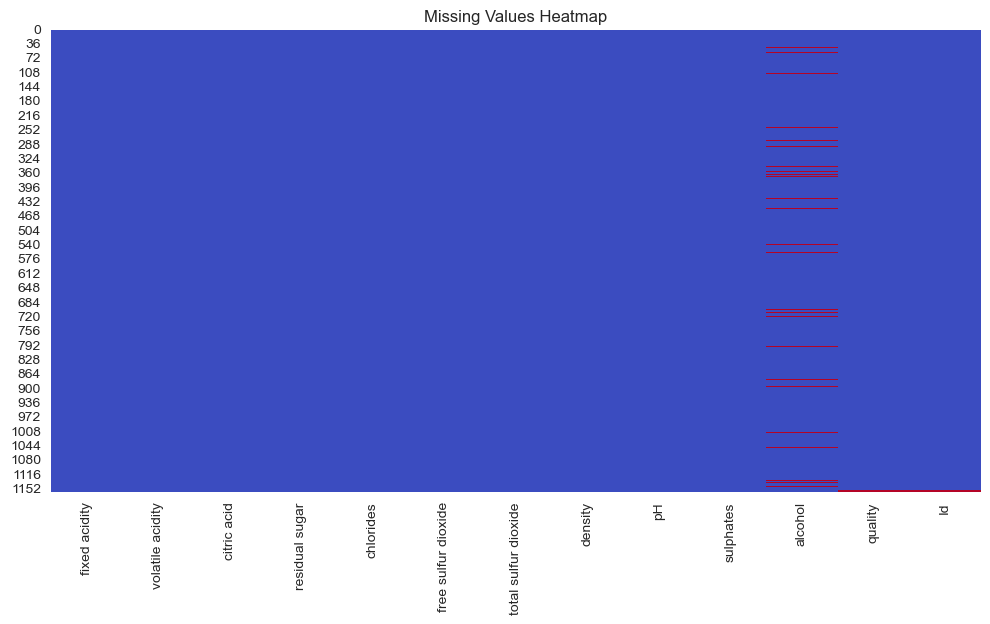

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm').set_title('Missing Values Heatmap')
plt.show()

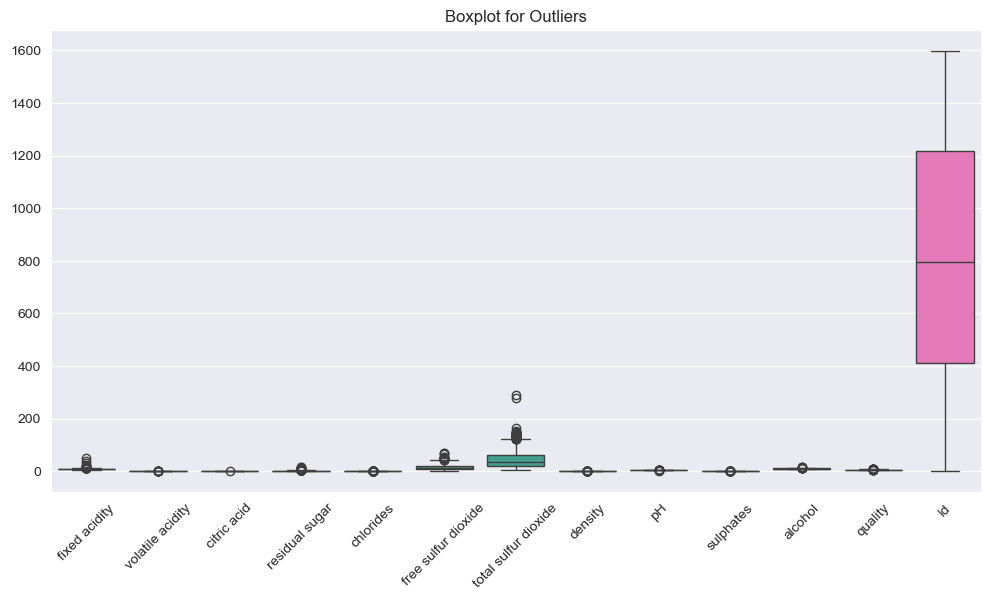

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number])).set_title('Boxplot for Outliers')
plt.xticks(rotation=45)
plt.show()